<a href="https://colab.research.google.com/github/nhrishi/1.1.0-experimental_bin/blob/master/TradingIntel_v0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas_ta
!pip install fyers_apiv3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=51adc2f939c2f261b4e13a06363d9cd28d3f4a2f7886c1d657adc12a27890f85
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.8/171.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 18.6 MB/s eta 0:00:00
     ━━━━━━

In [1]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.activations import relu, tanh, sigmoid

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import json as json

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

#pip install fyers_apiv3

In [12]:
from fyers_apiv3 import fyersModel

client_id = "Q9Y3IP8H5W-100"
#access_token = "eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTcwNzk5MzEsImV4cCI6MTcxNzExNTQ1MSwibmJmIjoxNzE3MDc5OTMxLCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbVdJOTdrQ19seDQzZEM4S1FhMGlRQ3pFNjg1Ti1rYlZiN3ROQ3E2QU1ubU95eU9kcUFaQms2ZzJNalhFQXFQWkpYeS1fMnJlSXhycWF4eWw4RklwcFNNc3BmclNhdHhMSHB6Z1p5MERIRV94Qk1Qaz0iLCJkaXNwbGF5X25hbWUiOiJIUklTSElLRVNIIERFRVBBSyBOQVNISUtLQVIiLCJvbXMiOiJLMSIsImhzbV9rZXkiOiIzMDI1Y2IzMjkxYWEzYTcyMzM3MWIyYzkxOGU4YTc5ZDFkZDk5ODlmMmI3NjcwY2ViZGZkNjQyNiIsImZ5X2lkIjoiWUgwMTc3NSIsImFwcFR5cGUiOjEwMCwicG9hX2ZsYWciOiJOIn0.6iCpNueqfkemVbnVBfC_N6vVbMoZM2mxiDCO9mnfCzA"
access_token = "eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTc4NTEzMzcsImV4cCI6MTcxNzg5MzAzNywibmJmIjoxNzE3ODUxMzM3LCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbVpGVEpqSm9MNjNfNU9kWlp4RFczV2licTdyd2RmVGkycWZKdTFJWEoxa1FodTRRb0V2QTRXT2t2N09rRnFwRmpFR1Y3ZXR3UFlmVlBaTTNLSW54al90UGNROV9NQ1lYekViSXZhbHk5OFZnd0ZpOD0iLCJkaXNwbGF5X25hbWUiOiJIUklTSElLRVNIIERFRVBBSyBOQVNISUtLQVIiLCJvbXMiOiJLMSIsImhzbV9rZXkiOiIzMDI1Y2IzMjkxYWEzYTcyMzM3MWIyYzkxOGU4YTc5ZDFkZDk5ODlmMmI3NjcwY2ViZGZkNjQyNiIsImZ5X2lkIjoiWUgwMTc3NSIsImFwcFR5cGUiOjEwMCwicG9hX2ZsYWciOiJOIn0.w7Rwd1esuLu8SZ_jekW3SmOoovH_72XcJO2GX-lmAX0"
# Initialize the FyersModel instance with your client_id, access_token, and enable async mode
fyers = fyersModel.FyersModel(client_id=client_id, is_async=False, token=access_token, log_path="")

#yyyy-mm-dd
#Daily data Extraction
# daily_data = {
#     "symbol":"NSE:SBIN-EQ",
#     "resolution":"D",
#     "date_format":"1",
#     "range_from":"2023-05-30",
#     "range_to":"2024-05-30",
#     "cont_flag":"1"
# }
daily_data = {
    "symbol":"MCX:CRUDEOIL24JUNFUT",
    "resolution":"D",
    "date_format":"1",
    "range_from":"2023-06-07",
    "range_to":"2024-06-07",
    "cont_flag":"1"
}


response = fyers.history(data=daily_data)
print(response)
daily_data_json = json.dumps(response)
daily_data_df = json.loads(daily_data_json)
print(daily_data_df['candles'])
pricing_daily_data = daily_data_df['candles']
daily_df = pd.DataFrame(pricing_daily_data)
daily_df.columns = ["epoch", "open", "high", "low", "close", "volume"]


# #hourly data Extraction
# hourly_data = {
#     "symbol":"NSE:SBIN-EQ",
#     "resolution":"60",
#     "date_format":"1",
#     "range_from":"2024-03-01",
#     "range_to":"2024-05-29",
#     "cont_flag":"1"
# }

# response = fyers.history(data=hourly_data)
# print(response)
# hourly_data_json = json.dumps(response)
# hourly_data_df = json.loads(hourly_data_json)
# print(hourly_data_df['candles'])
# pricing_hourly_data = hourly_data_df['candles']
# hourly_df = pd.DataFrame(pricing_hourly_data)
# hourly_df.columns = ["epoch", "open", "high", "low", "close", "volume"]


import datetime
daily_df['date'] = pd.to_datetime(daily_df['epoch'], unit='s').dt.strftime('%Y-%m-%d')
print(daily_df)

# hourly_df['date'] = pd.to_datetime(hourly_df['epoch'], unit='s').dt.strftime('%Y-%m-%d')
# print(hourly_df)


{'candles': [[1686096000, 5918, 6046, 5871, 6004, 44920], [1686182400, 5986, 6053, 5714, 5903, 99890], [1686268800, 5863, 5926, 5809, 5824, 44618], [1686528000, 5750, 5750, 5524, 5569, 67050], [1686614400, 5575, 5754, 5549, 5729, 50781], [1686700800, 5722, 5789, 5630, 5664, 32357], [1686787200, 5609, 5814, 5592, 5796, 12902], [1686873600, 5814, 5884, 5775, 5877, 22585], [1687132800, 5834, 5938, 5830, 5865, 17072], [1687219200, 5853, 5955, 5747, 5821, 35024], [1687305600, 5835, 5975, 5827, 5953, 28408], [1687392000, 5940, 5966, 5675, 5705, 47042], [1687478400, 5678, 5690, 5546, 5675, 36092], [1687737600, 5686, 5760, 5654, 5737, 31085], [1687824000, 5744, 5766, 5582, 5617, 52225], [1687910400, 5615, 5737, 5529, 5726, 54201], [1687996800, 5750, 5809, 5677, 5738, 24075], [1688083200, 5752, 5841, 5728, 5799, 45545], [1688342400, 5809, 5890, 5734, 5753, 42100], [1688428800, 5760, 5859, 5748, 5850, 23413], [1688515200, 5833, 5940, 5795, 5932, 42387], [1688601600, 5920, 5973, 5822, 5941, 43210

In [ ]:
#hourly_df.set_index('date', inplace=True)
#daily_df.set_index('date', inplace=True)

In [13]:
# Moving Average 20
#daily_df['MA_20'] = daily_df['close'].rolling(window=20).mean()
#daily_df.dropna(inplace=True)
#print(daily_df)

daily_df['DAILY_RSI']=ta.rsi(daily_df.close, length=15)
daily_df['DAILY_EMA5']=ta.ema(daily_df.close, length=5)
daily_df['DAILY_EMA12']=ta.ema(daily_df.close, length=12)
daily_df['DAILY_EMA13']=ta.ema(daily_df.close, length=13)
daily_df['DAILY_EMA26']=ta.ema(daily_df.close, length=26)
daily_df['DAILY_EMA50']=ta.ema(daily_df.close, length=50)
# daily_df['MACD_TA'], daily_df['histogram'], daily_df['signal']=ta.macd(daily_df.close, fast=12, slow=26, signal=9)


####### Daily MACD calculations ######
# # Calculate the 5-period EMA Daily
# daily_df['DAILY_EMA5'] = daily_df['close'].ewm(span=5, adjust=False).mean()

# # Calculate the 13-period EMA Daily
# daily_df['DAILY_EMA13'] = daily_df['close'].ewm(span=13, adjust=False).mean()

# # Calculate the 12-period EMA Daily
# daily_df['DAILY_EMA12'] = daily_df['close'].ewm(span=12, adjust=False).mean()

# # Calculate the 26-period EMA Daily
# daily_df['DAILY_EMA26'] = daily_df['close'].ewm(span=26, adjust=False).mean()

# # Calculate the 50-period EMA Daily
# daily_df['DAILY_EMA50'] = daily_df['close'].ewm(span=50, adjust=False).mean()

# # Calculate the 100-period EMA Daily
# daily_df['DAILY_EMA100'] = daily_df['close'].ewm(span=100, adjust=False).mean()

# Calculate MACD (the difference between 12-period EMA and 26-period EMA)
daily_df['DAILY_MACD'] = daily_df['DAILY_EMA12'] - daily_df['DAILY_EMA26']

# Calculate the 9-period EMA of MACD (Signal Line)
daily_df['DAILY_SIGNAL'] = daily_df['DAILY_MACD'].ewm(span=9, adjust=False).mean()

## Target calculation
daily_df['Target'] = daily_df['close']-daily_df.open
daily_df['Target'] = daily_df['Target'].shift(-1)

daily_df['TargetClass'] = [1 if daily_df.Target[i]>0 else 0 for i in range(len(daily_df))]

daily_df['TargetNextClose'] = daily_df['close'].shift(-1)

##ADX
adx_df = daily_df.ta.adx(high=daily_df['high'], low=daily_df['low'], close=daily_df['close']);
daily_df = pd.concat([daily_df, adx_df], axis=1)

##BB
bb_df = ta.bbands(daily_df.close, length=20, std=2).iloc[:, :3]
daily_df = pd.concat([daily_df, bb_df], axis=1)


#### Drop rows with NaN values created by indicators calculation

daily_df.dropna(inplace=True)
# hourly_df.dropna(inplace=True)
# daily_df.reset_index(inplace = True)

print(daily_df.shape)
# print(hourly_df.shape)

(208, 24)


In [14]:
# print(daily_df.shape)
# print(len(daily_df))
print(daily_df.shape)

# print(hourly_df.shape)

(208, 24)


In [15]:
features = ['close', 'DAILY_MACD', 'DAILY_RSI', 'DAILY_SIGNAL', 'volume', 'DAILY_EMA5', 'DAILY_EMA13', 'DAILY_EMA26', 'DAILY_EMA50', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'Target', 'TargetClass', 'TargetNextClose', 'ADX_14']
# Normalize features
scaler = MinMaxScaler()
#scaled_data = scaler.fit_transform(combined_df[['close', 'DAILY_MACD', 'DAILY_RSI', 'DAILY_SIGNAL', 'volume', 'HOURLY_RSI_max', 'HOURLY_RSI_min', 'DAILY_EMA5', 'DAILY_EMA13', 'DAILY_EMA26', 'HOURLY_EMA5_mean', 'HOURLY_EMA13_mean', 'HOURLY_EMA26_mean' ]])
scaled_data = scaler.fit_transform(daily_df[features])

#print(scaled_data)

In [7]:
print(scaled_data.shape)

(207, 16)


In [16]:
# Create sequences for LSTM model
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length, 0])  # Assuming 'Close' is the first column
    return np.array(sequences), np.array(labels)


# If the input data is not a 2D array, reshape it
if len(scaled_data.shape) != 2:
    scaled_data = scaled_data.reshape(-1, 1)

SEQ_LENGTH = 5  # 60 days sequence
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [74]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(162, 5, 16)
(162,)
(41, 5, 16)
(41,)


In [ ]:
# if len(X_train.shape) == 3:
#     X_train = np.expand_dims(X_train, axis=2)

In [20]:
model = Sequential([
    LSTM(150, activation='tanh', return_sequences=True, input_shape=(SEQ_LENGTH, X_train.shape[2])),
    Dropout(0.2),
    LSTM(150, activation='tanh', return_sequences=True),
    Dropout(0.2),
    LSTM(150, activation='tanh'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error')
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = model.fit(X_train, y_train, epochs=75, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/75
6/6 [==============================] - 7s 275ms/step - loss: 0.1076 - val_loss: 0.1221
Epoch 2/75
6/6 [==============================] - 0s 39ms/step - loss: 0.0344 - val_loss: 0.0218
Epoch 3/75
6/6 [==============================] - 0s 41ms/step - loss: 0.0290 - val_loss: 0.0142
Epoch 4/75
6/6 [==============================] - 0s 39ms/step - loss: 0.0226 - val_loss: 0.0044
Epoch 5/75
6/6 [==============================] - 0s 38ms/step - loss: 0.0183 - val_loss: 0.0076
Epoch 6/75
6/6 [==============================] - 0s 38ms/step - loss: 0.0109 - val_loss: 0.0177
Epoch 7/75
6/6 [==============================] - 0s 40ms/step - loss: 0.0113 - val_loss: 0.0041
Epoch 8/75
6/6 [==============================] - 0s 39ms/step - loss: 0.0134 - val_loss: 0.0037
Epoch 9/75
6/6 [==============================] - 0s 39ms/step - loss: 0.0093 - val_loss: 0.0048
Epoch 10/75
6/6 [==============================] - 0s 38ms/step - loss: 0.0117 - val_loss: 0.0041
Epoch 11/75
6/6 [===========

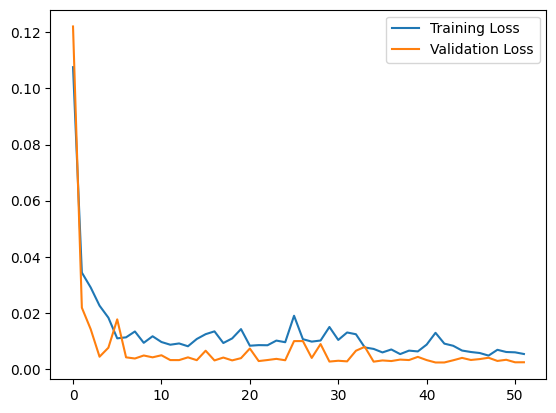

X_test (41, 5, 16)
2/2 [==============================] - 0s 57ms/step
(41, 1)
(41,)


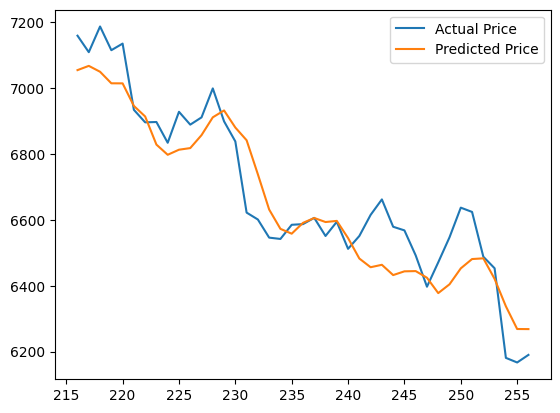

[7054.54197806 7067.39625019 7049.5403735  7014.49216139 7014.2862348
 6945.7785992  6913.83289081 6828.39870733 6797.50118387 6812.90251446
 6817.80418587 6857.11489302 6911.21409816 6932.05053043 6880.20959181
 6841.61907119 6738.14522308 6631.35397789 6572.6549415  6557.9883298
 6590.79602343 6605.61185461 6593.36447847 6596.79819626 6544.63272226
 6482.59433565 6456.14668187 6463.52305916 6432.30038193 6443.67526007
 6444.41789445 6424.20728114 6377.59279665 6404.28620186 6452.71803495
 6480.97530735 6483.1354959  6420.73336747 6337.51434815 6268.60592869
 6268.31954849]


In [109]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

print("X_test", X_test.shape)

# Make predictions
predicted_prices = model.predict(X_test)
print(predicted_prices.shape)
predicted_prices = scaler.inverse_transform(np.concatenate([predicted_prices, np.zeros((predicted_prices.shape[0], X_test.shape[2] - 1))], axis=1))[:, 0]
print(predicted_prices.shape)

# Plot predicted vs actual prices
plt.plot(daily_df.index[-len(y_test):], scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], X_test.shape[2] - 1))], axis=1))[:, 0], label='Actual Price')
plt.plot(daily_df.index[-len(y_test):], predicted_prices, label='Predicted Price')
plt.legend()
plt.show()

print(predicted_prices)


In [98]:
recent_data = scaled_data[-SEQ_LENGTH:]
print("recent_data:", recent_data.shape)

recent_data: (5, 16)


In [114]:
# Function to make predictions iteratively
def predict_next_days(model, recent_data, num_days):
    predictions = []
    current_sequence = recent_data
    print("current:", current_sequence.shape)

    for _ in range(num_days):
        # Reshape the sequence to fit the model input shape
        #current_sequence_reshaped = np.reshape(current_sequence, (1, SEQ_LENGTH, current_sequence.shape[1]))
        current_sequence_reshaped = np.reshape(current_sequence, (1, current_sequence.shape[0], current_sequence.shape[1]))

        print("current_sequence_reshaped", current_sequence_reshaped.shape, current_sequence_reshaped)

        # Predict the next day's value
        next_prediction = model.predict(current_sequence_reshaped)[0]
        print("predict:", next_prediction.shape)

        # Reshape the next prediction to match the first element of current_sequence
        #next_prediction = next_prediction.reshape(1, current_sequence.shape[1])

        #next_prediction = next_prediction.reshape((1, current_sequence.shape[1]))
        #next_prediction = next_prediction.reshape((1, 1))

        # Append the prediction to the list of predictions
        predictions.append(next_prediction)  # We are interested only in the 'Close' price
        print("predictions:", predictions)
        print("next:", next_prediction.shape, next_prediction)
        print("curr:", current_sequence[1:].shape, current_sequence[1:])
        # Update the current sequence
        next_input = np.append(current_sequence[1:], [next_prediction], axis=0)
        current_sequence = next_input

    return np.array(predictions)

# Predict the next 5 days
predicted_next_5_days = predict_next_days(model, recent_data, 2)

# Inverse transform the predicted values to original scale
predicted_next_5_days = scaler.inverse_transform(np.concatenate([np.array(predicted_next_5_days).reshape(-1, 1), np.zeros((2, scaled_data.shape[1] - 1))], axis=1))[:, 0]

print(predicted_next_5_days)


current: (5, 16)
current_sequence_reshaped (1, 5, 16) [[[0.37156627 0.3438808  0.24954796 0.29526676 0.35221755 0.39617239
   0.37055146 0.44494479 0.53580095 0.52431467 0.3786087  0.26499977
   0.53963415 0.         0.3546988  0.43198964]
  [0.3546988  0.33580681 0.21588328 0.29868162 0.25579731 0.37832663
   0.35996643 0.43498117 0.52649303 0.5158888  0.37537391 0.2671268
   0.20426829 0.         0.22361446 0.43008069]
  [0.22361446 0.28481241 0.00865675 0.28989942 0.64725426 0.31475798
   0.32472301 0.40975989 0.50545952 0.45308524 0.36281739 0.30307095
   0.55945122 1.         0.21686747 0.47610411]
  [0.21686747 0.24468781 0.         0.27381389 0.33967729 0.26971932
   0.29316736 0.38558355 0.48462855 0.40463735 0.34827826 0.32236133
   0.64786585 1.         0.22795181 0.53327633]
  [0.22795181 0.2198347  0.03310761 0.25533385 0.31701624 0.24406282
   0.2683326  0.36455062 0.46563684 0.36987901 0.33446957 0.33032796
   0.73018293 1.         0.29349398 0.57788232]]]
1/1 [==========

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 16 and the array at index 1 has size 1